In [1]:
import pandas as pd
import os

In [2]:
files = [file for file in os.listdir('./Sales_Data')]
all_data = pd.DataFrame()
for file in files:
    all_data = pd.concat([all_data,pd.read_csv('./Sales_Data/'+file)])
all_data.to_csv("all_data.csv",index=False)

all_data = pd.read_csv('./all_data.csv')

#drop rows that have all values of NAN
all_data = all_data.dropna(how='all')

#drop rows that have 'or' value of month!
all_data = all_data[all_data['Order Date'].str[0:2] != 'Or']

In [3]:
##Add month column
all_data['Month'] = all_data['Order Date'].str[0:2]
all_data['Month'] = all_data['Month'].astype("int32")



In [4]:
##Add total amount of price
all_data['Quantity Ordered'] = pd.to_numeric(all_data['Quantity Ordered'])
all_data['Price Each'] = pd.to_numeric( all_data['Price Each'])
all_data['Total'] = all_data['Quantity Ordered'] * all_data['Price Each']
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Total
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4,23.90
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",4,99.99
3,176560,Google Phone,1,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,600.00
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,11.99
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",4,11.99


In [5]:
res = all_data.groupby('Month').sum()

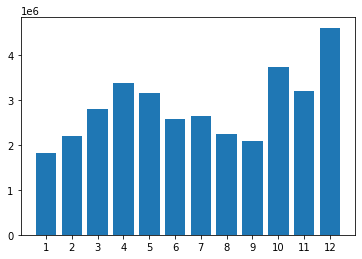

In [6]:
import matplotlib.pyplot as plt
months = range(1,13)
plt.bar(months,res['Total'])
plt.xticks(months)
plt.show()

In [7]:
#finding which city has the highest revenue
all_data['City'] = all_data['Purchase Address'].str.split(',').apply(lambda x: x[1]+x[-1][0:3])
City_Total = all_data.groupby('City').sum()
City_Total

,Quantity Ordered,Price Each,Month,Total
City,,,,
Atlanta GA,16602,2.779908e+06,104794,2.795499e+06
Austin TX,11153,1.809874e+06,69829,1.819582e+06
Boston MA,22528,3.637410e+06,141112,3.661642e+06
Dallas TX,16730,2.752628e+06,104620,2.767975e+06
Los Angeles CA,33289,5.421435e+06,208325,5.452571e+06
New York City NY,27932,4.635371e+06,175741,4.664317e+06
Portland ME,2750,4.471893e+05,17144,4.497583e+05
Portland OR,11303,1.860558e+06,70621,1.870732e+06
San Francisco CA,50239,8.211462e+06,315520,8.262204e+06


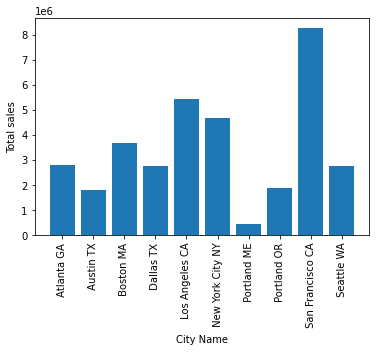

In [8]:
import matplotlib.pyplot as plt
cities = [city for city,df in all_data.groupby('City')]
plt.bar(cities,City_Total['Total'])
plt.xticks(cities,rotation='vertical',size=10)
plt.xlabel('City Name')
plt.ylabel('Total sales')
plt.show()

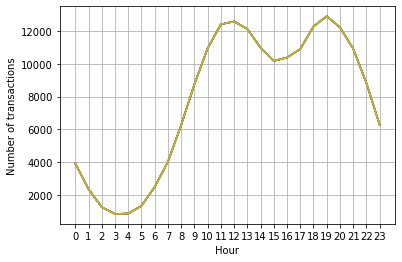

In [9]:
all_data['Order Date'] = pd.to_datetime(all_data['Order Date'])
all_data['Hour'] = all_data['Order Date'].dt.hour
hours = [hour for hour,df in all_data.groupby('Hour')]
plt.plot(hours,all_data.groupby('Hour').count())
plt.xticks(hours)
plt.grid()
plt.xlabel('Hour')
plt.ylabel('Number of transactions')
plt.show()
#There are peak in number of transactions around 11 and 19

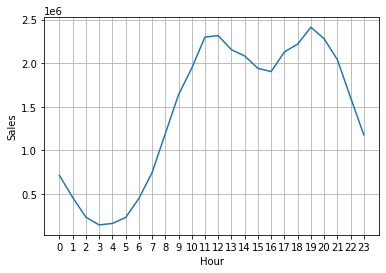

In [10]:
all_data['Order Date'] = pd.to_datetime(all_data['Order Date'])
all_data['Hour'] = all_data['Order Date'].dt.hour
hours = [hour for hour,df in all_data.groupby('Hour')]
plt.plot(hours,all_data.groupby('Hour')['Total'].sum())
plt.xticks(hours)
plt.xlabel('Hour')
plt.ylabel('Sales')
plt.grid()
plt.show()
#There are peak in sales around 11 and 19

In [14]:
order = all_data[all_data['Order ID'].duplicated(keep=False)]
order['Group'] = order.groupby('Order ID')['Product'].transform(lambda x: ','.join(x))
order = order.drop_duplicates(subset=['Order ID'])
order = order[['Order ID','Group']]
order = order.set_index('Order ID')
order.head()

<ipython-input-14-415a9aa8994f>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  order['Group'] = order.groupby('Order ID')['Product'].transform(lambda x: ','.join(x))


,Group
Order ID,
176560,"Google Phone,Wired Headphones"
176574,"Google Phone,USB-C Charging Cable"
176585,"Bose SoundSport Headphones,Bose SoundSport Hea..."
176586,"AAA Batteries (4-pack),Google Phone"
176672,"Lightning Charging Cable,USB-C Charging Cable"


In [24]:
dups = order.pivot_table(index=['Group'], aggfunc='size')
dups

Group
20in Monitor,20in Monitor                             3
20in Monitor,27in FHD Monitor                         2
20in Monitor,34in Ultrawide Monitor                   1
20in Monitor,AA Batteries (4-pack)                    6
20in Monitor,AAA Batteries (4-pack)                   3
                                                   ... 
iPhone,USB-C Charging Cable                          12
iPhone,Vareebadd Phone                                3
iPhone,Wired Headphones                             361
iPhone,Wired Headphones,Lightning Charging Cable      1
iPhone,iPhone                                         1
Length: 366, dtype: int64